==========================
## 6. Visualizing topic models
==========================

#### Note
Unlike R or Octave/Matlab, Python has no native graphing or
    visualization library. The most widely used library for visualization is
    `matplotlib <http://matplotlib.org>`_ and its functions mimic those found in
    Octave/Matlab (see :ref:`getting-started-matplotlib`).

### 6a. Visualizing topic shares
========================

When using topic models to explore text collections, we are typically interested
in examining texts in terms of their constituent topics (instead of word
frequencies).  Because the number of topics is so much smaller than the number
of unique vocabulary elements (say, 20 versus 20,000), a range of data
visualization methods become available. The visualization techniques discussed
below are not specific to topic models per se but rather fall into a more
general category for techniques for visualizing count data.

The first way of visualizing the topic proportions associated with documents in
a corpus uses a "stacked bar chart".  This visualization tends to be used
when the number of topics is small. For example, a stacked
bar chart is found in a paper employing LDA *avant la lettre* on `allele
<https://en.wikipedia.org/wiki/Allele>`_ frequency data
:cite:`rosenberg_genetic_2002`. [#fnpritchard]_


In [63]:
import numpy as np; np.set_printoptions(precision=4)
import pandas as pd

### - Stacked bar chart
-----------------

The idea underlying the stacked bar chart is that each text has some proportion
of its words associated with each topic. Because the model assumes that every
word is associated with some topic, these proportions must add up to one. For
example, in a three topic model, text number 1 might have 50% of its words
associated with topic 1, 25% with topic 2, and 25% with topic 3. The stacked bar
chart represents each document as a bar broken into colored segments matching
the associated proportions of each topic. The stacked bar chart below expresses
the topic proportions found in the six novels in the ``austen-brontÃ«`` corpus:

.. figure:: _static/plot_doctopic_stacked_bar.png
    :scale: 60 %
    :alt: Topic shares in six novels

If we look ahead to the :ref:`top 10 words associated with each topic
<visualizing-topic-word>`, we find that topics 0 and 1 are associated with words
we anticipate finding in Austen ('emma', 'elizabeth', 'darcy', 'sister'). Topic
4 is connected with *Jane Eyre* ('rochester', 'house').

This method of visualization works well when there are a small number of topics.
With more than a handful of topics, the proportion associated with
each topic tends to be difficult to distinguish. This is a limitation of the
stacked bar chart. On the other hand, the visualization clearly communicates the
idea that a document is made up of topic proportions that, taken together,
account for all the words in a document.


To reproduce the stacked bar chart shown above we first need to model the
``austen-brontÃ«`` corpus using a five-topic topic model. We will use the
procedure described in :ref:`topic-model-mallet`. First
we run MALLET using default parameters. As we will be analyzing more precisely
the association of words with topics, we will specify that the counts of
word-topic assignments be saved with the command-line option ``--word-topic counts
/tmp/word-topic.txt``.

bash

    mallet-2.0.7/bin/mallet import-dir --input data/austen-brontÃ«-split/ --output /tmp/topic-input.mallet --keep-sequence --remove-stopwords
    mallet-2.0.7/bin/mallet train-topics --input /tmp/topic-input.mallet --num-topics 5 --output-doc-topics /tmp/doc-topics.txt --output-topic-keys /tmp/topic-keys.txt --word-topic-counts-file /tmp/word-topic.txt


In [ ]:
'''$ac didnt' work with my_ generated files
   substituded with tatom files from directory cache
   specifically replaced myTAToM\tmp\doc-topics-austen-bronte
   with tatom\tatom-develop\source\cache\doc-topic-austen-brontë-20topics.txt
   saved mine just in case, starting with my_
'''

In [29]:
#hardcoded a bunch to make it work

import os
import shutil
import subprocess

N_TOPICS = 5
"""
MALLET_INPUT = 'tmp6Vis/topic-input.mallet'
MALLET_TOPICS = 'tmp6Vis/doc-topic{}topics.txt'.format(N_TOPICS)
MALLET_WORD_TOPIC_COUNTS = 'tmp6Vis/doc-topic{}topics-word-topic.txt'.format(N_TOPICS)
MALLET_KEYS = 'tmp6Vis/doc-topic{}topics-keys.txt'.format(N_TOPICS)
"""

MALLET_INPUT = 'source/cache_original/cache/topic-input.mallet'
MALLET_TOPICS = 'source/cache_original/cache/doc-topic-austen-bronte-{}topics.txt'.format(N_TOPICS)
MALLET_WORD_TOPIC_COUNTS = 'source/cache_original/cache/doc-topic-austen-bronte-{}topics-word-topic.txt'.format(N_TOPICS)
MALLET_KEYS = 'source/cache_original/cache/doc-topic-austen-bronte-{}topics-keys.txt'.format(N_TOPICS)

"""
if not os.path.exists(MALLET_INPUT):
    subprocess.check_call('mallet import-dir --input data/austen-bronte-split/ --output {} --keep-sequence --remove-stopwords'.format(MALLET_INPUT), shell=True)
"""

"\nif not os.path.exists(MALLET_INPUT):\n    subprocess.check_call('mallet import-dir --input data/austen-bronte-split/ --output {} --keep-sequence --remove-stopwords'.format(MALLET_INPUT), shell=True)\n"

In [30]:
shutil.copy(MALLET_INPUT,'tmp/topic-input.mallet')
"""
if not os.path.exists(MALLET_TOPICS):
    subprocess.check_call('mallet-2.0.7/bin/mallet train-topics --input/tmp/topic-input.mallet --num-topics {} --output-doc-topics {} --output-topic-keys {} --word-topic-counts-file {} --random-seed 1'.format(N_TOPICS, MALLET_TOPICS, MALLET_KEYS, MALLET_WORD_TOPIC_COUNTS), shell=True)
"""
shutil.copy(MALLET_TOPICS,'tmp/doc-topics.txt')
shutil.copy(MALLET_KEYS,'tmp/topic-keys.txt')
shutil.copy(MALLET_WORD_TOPIC_COUNTS,'tmp/word-topic.txt')


'tmp/word-topic.txt'

In [32]:
import numpy as np
import itertools
import operator
import os

def grouper(n, iterable, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    # grouper(3, 'ABCDEFG', 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

doctopic_triples = []

with open("tmp/doc-topics.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        for topic, share in grouper(2, values):
            triple = (docname, int(topic), float(share))
            doctopic_triples.append(triple)

# sort the triples
doctopic_triples.sort(key=operator.itemgetter(0,1))
docnames_chunks = sorted(set([triple[0] for triple in doctopic_triples]))
docnames_chunks_base = np.array([os.path.splitext(n)[0].rstrip('0123456789') for n in docnames_chunks])
num_topics = len(doctopic_triples) // len(docnames_chunks)

doctopic_chunks = np.empty((len(docnames_chunks), num_topics))

# the following works because we know that the triples are in sequential order
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = docnames_chunks.index(docname)
    doctopic_chunks[row_num, topic] = share


In [35]:
#assert
np.all(doctopic_chunks > 0)
np.allclose(np.sum(doctopic_chunks, axis=1), 1)


True

In [40]:
num_groups = len(set(docnames_chunks_base))
doctopic = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(docnames_chunks_base))):
    doctopic[i, :] = np.mean(doctopic_chunks[docnames_chunks_base == name, :], axis=0)
docnames = sorted(set(os.path.basename(n) for n in docnames_chunks_base))


We then gather the output into a document-topic matrix of topic shares, stored
in the variable ``doctopic``. The names of the novels are stored in the variable
``docnames``.

In [41]:
#assert
docnames
doctopic.shape
doctopic

array([[ 0.0625,  0.1736,  0.0819,  0.4649,  0.2171],
       [ 0.0574,  0.1743,  0.0835,  0.4008,  0.2839],
       [ 0.0599,  0.1645,  0.0922,  0.2034,  0.4801],
       [ 0.189 ,  0.1897,  0.3701,  0.1149,  0.1362],
       [ 0.2772,  0.2681,  0.2387,  0.0838,  0.1322],
       [ 0.3553,  0.193 ,  0.2409,  0.0865,  0.1243]])

To make the stacked bar chart we layer individual bar charts on top of each
other. Recall that a single (unstacked) bar chart can be created in matplotlib
with the following code:


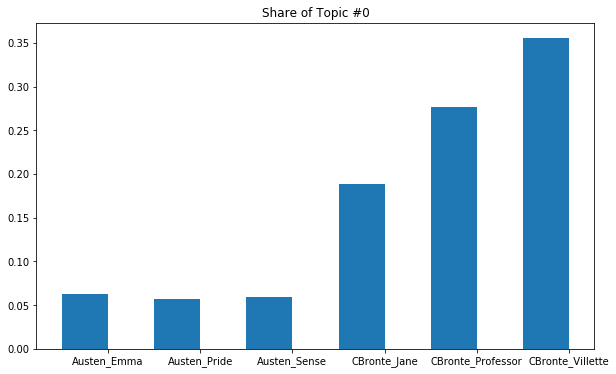

In [56]:
import matplotlib.pyplot as plt

N, K = doctopic.shape
ind = np.arange(N)  # points on the x-axis
width = 0.5

plt.figure(figsize=(10,6))
plt.bar(ind, doctopic[:,0], width=width)
plt.xticks(ind + width/2, docnames)  # put labels in the center
plt.savefig('plots/plot_6Vis_example_topic0_bar.png', bbox_inches='tight')
plt.title('Share of Topic #0')
plt.show()

#### Note
The `matplotlib examples page
    <http://matplotlib.org/examples/index.html>`_ describes
    how to produce various types of graphs using matplotlib.

To layer the bar charts, we plot each bar chart one by one, adjusting the
starting point (``bottom`` is the parameter) so that the charts do not overlap.


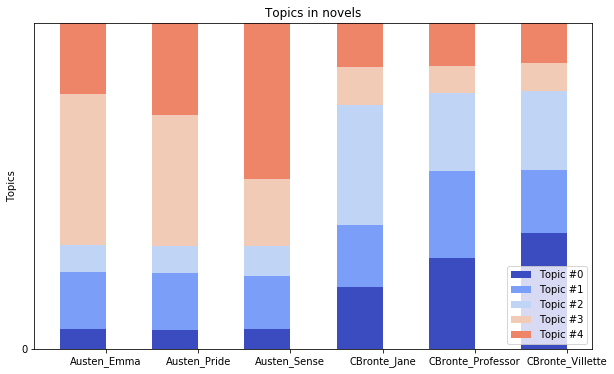

In [55]:
# See: http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

N, K = doctopic.shape  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

plt.figure(figsize=(10,6))
for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        # first plot
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)
plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')
plt.title('Topics in novels')
plt.xticks(ind+width/2, docnames)
plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
# see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend for details
# on making a legend in matplotlib
plt.legend([p[0] for p in plots], topic_labels)
plt.savefig('plots/plot_6Vis_doctopic_stacked_bar.png', bbox_inches='tight')
plt.show()


### - Heatmap
-------

Another useful visualization of topic shares is the heatmap. The matplotlib
function we need is ``pcolor`` ("psuedocolor plot").

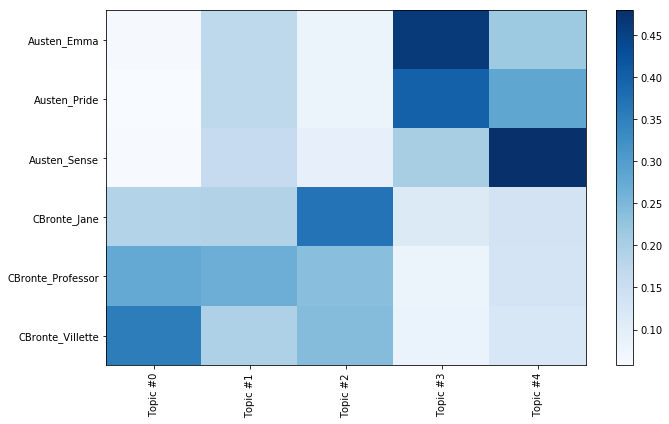

In [58]:
# Ref: http://nbviewer.ipython.org/5427209
# Ref: http://code.activestate.com/recipes/578175-hierarchical-clustering-heatmap-python/
plt.figure(figsize=(10,6))
plt.pcolor(doctopic, norm=None, cmap='Blues')

# put the major ticks at the middle of each cell
# the trailing semicolon ';' suppresses output
plt.yticks(np.arange(doctopic.shape[0])+0.5, docnames);
plt.xticks(np.arange(doctopic.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then BrontÃ«)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')

plt.tight_layout()  # fixes margins
plt.savefig('plots/plot_6Vis_doctopic_heatmap.png', bbox_inches='tight')
plt.show()

Again, we see that topics 0 and 1 are strongly associated with the Austen
novels, whereas words assigned to topic 3 predominate in novels written by
BrontÃ«.

### 6b. Visualizing topic-word associations
===================================

#### Note
For the following visualizations we will need the counts of
    word-to-topic assignments. These are stored in a file specified by the
    MALLET option ``--word-topic-counts-file``. The following assumes that the
    file containing the counts is available at ``/tmp/word-topic.txt``.

##### Table
-----

We have already seen a simple way of "visualizing" the associations between
topics and words: lists of the top words associated with each topic are often
all that is needed when the corpus is large and the inferred topics make sense
in light of prior knowledge of the corpus.

In [60]:
with open('tmp/topic-keys.txt') as input:
    topic_keys_lines = input.readlines()
topic_words = []
for line in topic_keys_lines:
    _, _, words = line.split('\t')  # tab-separated
    words = words.rstrip().split(' ')  # remove the trailing '\n'
    topic_words.append(words)

for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: hand good madame life heart thought de day monsieur eye school bretton man john dr
Topic 1: looked found side speak girl gave word made sense eyes called spoke smile character appeared
Topic 2: night room door long house rochester round hour heard back looked sir thought face eyes
Topic 3: mr miss mrs emma jane good elizabeth thing dear great harriet father friend weston young
Topic 4: elinor mother sister marianne time mrs felt letter make john mind feelings hope heart give


In [64]:
N_WORDS_DISPLAY = 10
OUTPUT_HTML_PATH = os.path.join('source', 'generated')
arr = np.row_stack([words[:N_WORDS_DISPLAY] for words in topic_words])
rownames = ["Topic {}".format(t) for t in range(len(topic_words))]
colnames = ['']*N_WORDS_DISPLAY
html = pd.DataFrame(arr, index=rownames, columns=colnames).to_html()
with open(os.path.join(OUTPUT_HTML_PATH, 'visualization_topic_model_words.txt'), 'w') as f:
    f.write(html)

In [65]:
#display inline
df = pd.DataFrame(arr, index=rownames, columns=colnames)
df

,,,,,,,,,,
Topic 0,hand,good,madame,life,heart,thought,de,day,monsieur,eye
Topic 1,looked,found,side,speak,girl,gave,word,made,sense,eyes
Topic 2,night,room,door,long,house,rochester,round,hour,heard,back
Topic 3,mr,miss,mrs,emma,jane,good,elizabeth,thing,dear,great
Topic 4,elinor,mother,sister,marianne,time,mrs,felt,letter,make,john



#### Sizing words according to strength of association with a topic
--------------------------------------------------------------

Each topic is a distribution over the vocabulary of words found in the corpus.
The top words (saved via the ``--topic-keys`` option) are those words most
likely to be found in each topic. Displaying the top words does not, however,
convey any information about the probability of finding a top word assigned to
a specific topic. This is often critical information.  (For those in the process
of learning about discrete probability distributions, we may think of this
probability as the 'strength of association' between a word and a topic.) For
example, the top five words of topic 1 may be much more strongly associated with
the topic than the top five words of topic 2. In some cases this can be extreme,
the tenth top word for topic 1 may hardly ever be associated with topic 1,
whereas the tenth top word for topic 2 may be assigned frequently to topic 2.
Moreover, if most of the words in the vocabulary are equally associated with
a topic then identifying the "top 10 words" is misleading.

To estimate the strength of association between a given word and a given topic
we need the information saved in the file specified by the MALLET option
``--word-topic-counts-file``, here ``/tmp/word-topic.txt``. The first few lines
of this file look like this: 


   0 delightful 0:86  
   1 thing 0:801 3:1  
   2 daughter 1:278  
   3 married 1:251  

The first line indicates that the word 'delightful' is assigned to topic 0 86
times. The second line tells us that the word 'thing' is associated with topic
0 801 times and to topic 3 once.

In order to make systematic use of this information we need to parse this file
into a matrix of counts. We do this much in the same manner as we parsed
``doc-topics.txt`` into a matrix of document-topic shares. The following
procedure should be familiar by now:

In [67]:
import numpy as np
import os

num_topics = 5

mallet_vocab = []
word_topic_counts = []

with open("tmp/word-topic.txt") as f:
    for line in f:
        _, word, *topic_count_pairs = line.rstrip().split(' ')
        # turn topic_count_pairs from a string like "0:30 1:20" to a sequence of pairs [(0, 30), (1, 20)]
        topic_count_pairs = [pair.split(':') for pair in topic_count_pairs]
        mallet_vocab.append(word)
        # allocate an 'empty' array of zeros to store the counts for this word
        counts = np.zeros(num_topics)
        for topic, count in topic_count_pairs:
            counts[int(topic)] = int(count)
        word_topic_counts.append(counts)
word_topic = np.array(word_topic_counts)

word_topic.shape

(21988, 5)


Since topics will be assigned differing numbers of words we need to normalize
this matrix of counts in much the same way as we did for the matrix of
document-term counts (see :ref:`working-with-text`). For example, while the word
"delightful" may be assigned to topic 0 86 times, there may be many other words
that are also assigned to topic 0 a similar or greater number of times. In order
to measure the strength of association between "delightful" and topic 0 we need
to know how likely it is to be associated with topic 0 relative to all other
words.  We do this by calculating the proportion of words assigned to topic
0 that are the word "delightful". Doing this for each word and each topic in
turn will turn our matrix of word-topic counts into a matrix of word-topic
proportions. For example, a value of 0.5 in the matrix at row 5 and column
0 indicates that the specified word type (``mallet_vocab[5]``) accounts for 50
percent of all words assigned to topic 0.

In [68]:
# np.sum(word_topic, axis=0) sums across rows, so it yields totals of words assigned to topics
word_topic = word_topic / np.sum(word_topic, axis=0)

Now we can assemble a list of each topic's top words along with a value that
captures the strength of association with that topic.

In [69]:
num_top_words = 10
mallet_vocab = np.array(mallet_vocab)  # convert vocab from a list to an array so we can use NumPy operations on it
for t in range(num_topics):
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = mallet_vocab[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    print("Topic #{}:".format(t))
    for word, share in zip(top_words, top_words_shares):
        print("{} : {}".format(np.round(share, 3), word))

Topic #0:
0.008 : hand
0.008 : good
0.007 : madame
0.007 : life
0.006 : heart
0.005 : thought
0.005 : de
0.005 : day
0.005 : monsieur
0.004 : eye
Topic #1:
0.007 : looked
0.006 : found
0.006 : side
0.005 : speak
0.005 : girl
0.005 : gave
0.005 : word
0.005 : made
0.005 : sense
0.005 : eyes
Topic #2:
0.01 : night
0.009 : room
0.008 : door
0.008 : long
0.006 : house
0.006 : rochester
0.006 : round
0.005 : hour
0.005 : heard
0.005 : back
Topic #3:
0.041 : mr
0.023 : miss
0.022 : mrs
0.013 : emma
0.012 : jane
0.01 : good
0.01 : elizabeth
0.009 : thing
0.009 : dear
0.009 : great
Topic #4:
0.01 : elinor
0.009 : mother
0.009 : sister
0.008 : marianne
0.008 : time
0.008 : mrs
0.007 : felt
0.006 : letter
0.006 : make
0.006 : john


One way to visualize this information is to size each word in proportion to its
share of words associated with each topic:

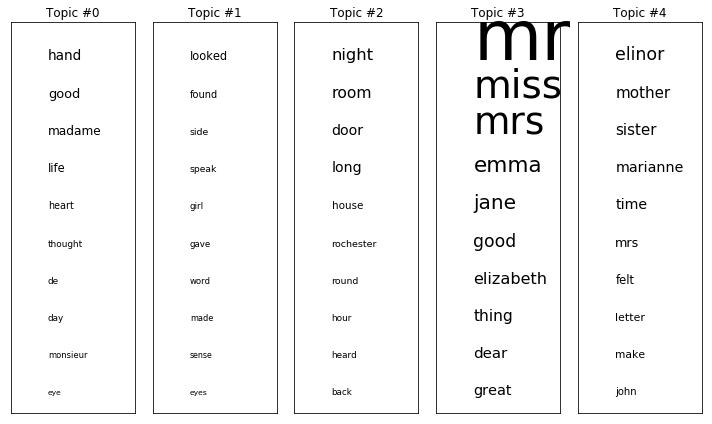

In [74]:
import matplotlib.pyplot as plt
num_top_words = 10
fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
plt.figure(figsize=(10,6))
for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = mallet_vocab[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base*share)
plt.savefig('plots/plot_6Vis_word_topic.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

We can see that topic 3 is much more concentrated on the words shown above
whereas topic 0 is much more diffuse (or uniform). Another way to appreciate
this is to calculate the number of word *types* associated with each topic:

In [75]:
np.sum(word_topic > 0, axis=0)

array([6564, 4737, 5717, 3117, 3749])

This shows us that a greater diversity of vocabulary items are associated with
topic 0 (likely many of the French words that appear only in BrontÃ«'s *The
Professor*) than with topic 3.
